In [1]:
import numpy as np
from tqdm.notebook import tqdm
from simplegrad import *
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from simplegrad.algo.nn import DenseLayer
from simplegrad.algo.optimize import Adam
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_moons(n_samples=1001, noise=0.15)

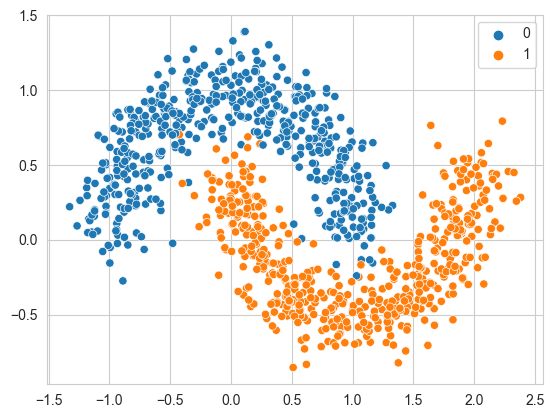

In [3]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.ravel(y))
None

In [4]:
denseLayerOne = DenseLayer(num_neurons=64, activation='elu')
denseLayerTwo = DenseLayer(num_neurons=32, activation='elu')
denseLayerThree = DenseLayer(num_neurons=1, activation='sigmoid')

In [5]:
def makeModel(input):
    model = denseLayerOne(input)
    model = denseLayerTwo(model)
    model = denseLayerThree(model)
    return model

In [6]:
X_var = Value(X)
model = makeModel(X_var)
model.shape

(1001, 1)

In [7]:
loss = ((model - y) ** 2).sum()

In [8]:
optimizer = Adam(
    model=loss,
    variables=denseLayerOne.getTrainable() +
              # denseLayerTwo.getTrainable() +
              denseLayerThree.getTrainable(),
    lr=0.001
)

In [9]:
history = []
for _ in tqdm(range(500)):
    optimizer.step()
    history.append(loss.value[0, 0])

  0%|          | 0/500 [00:00<?, ?it/s]

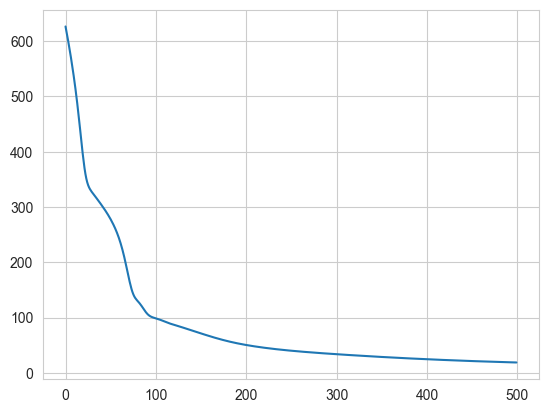

In [10]:
sns.lineplot(x=np.arange(len(history)), y=history)
None

In [12]:
accuracy_score(np.rint(model.forward()), y)


0.984015984015984